In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np

# 데이터 로딩 및 전처리
url = 'https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/abalone.csv'
data = pd.read_csv(url)
data = data.drop(columns='id')

# 성별 'Sex' 원-핫 인코딩
encoder = OneHotEncoder(sparse=False)
sex_encoded = encoder.fit_transform(data[['Sex']])
sex_encoded_df = pd.DataFrame(sex_encoded, columns=encoder.get_feature_names_out())

# 원-핫 인코딩된 데이터를 기존 데이터프레임에 결합
data = pd.concat([data.drop(columns='Sex'), sex_encoded_df], axis=1)

# 특성과 레이블 분리
X = data.drop('Rings', axis=1)
y = data['Rings']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Hyeon\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\Hyeon\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [2]:
# 신경망 모델 구축
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50


C:\Users\Hyeon\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 75.8568 - val_loss: 17.0467
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.6880 - val_loss: 6.3515
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.1686 - val_loss: 4.8927
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2654 - val_loss: 4.5400
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.4167 - val_loss: 4.4726
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.9480 - val_loss: 4.3835
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.7465 - val_loss: 4.3781
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.2530 - val_loss: 4.2889
Epoch 9/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.0513 - val_loss: 4.1600
Epoch 10/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.1469 - val_loss: 4.2036
Epoch 11/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.7382 - val_loss: 4.0972
Epoch 12/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.9294 - val_loss: 4.17

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


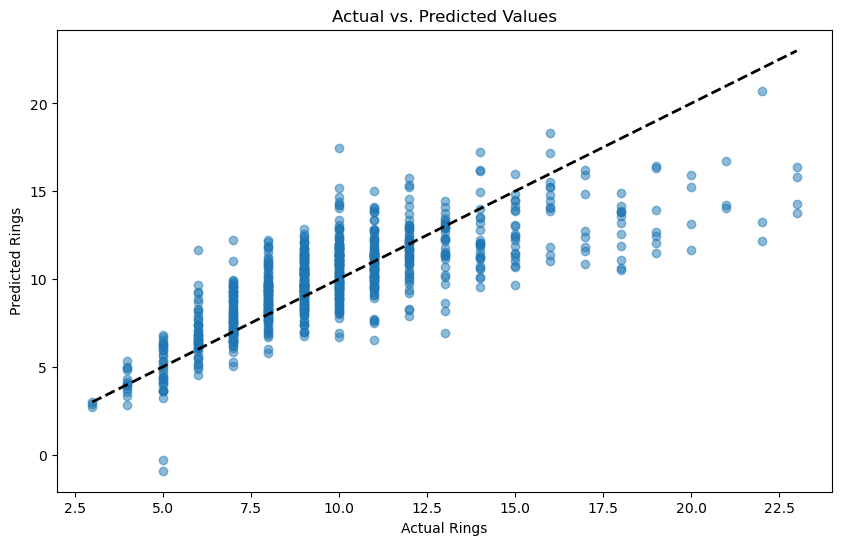

RMSE: 2.140
R² Score: 0.577


In [3]:

import matplotlib.pyplot as plt

# 예측
y_pred = model.predict(X_test).flatten()

# 실제 값과 예측 값 비교 그래프
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 완벽한 예측선
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.show()

# 성능 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# 결과 출력
print(f'RMSE: {rmse:.3f}')
print(f'R² Score: {r2:.3f}')



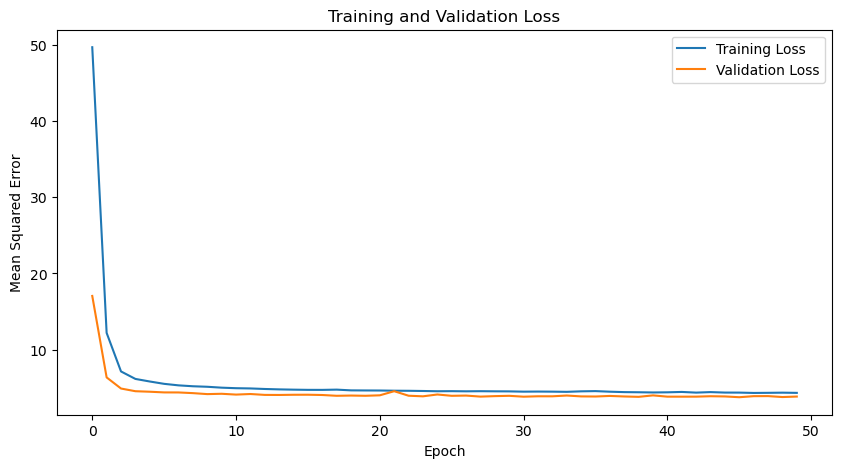

In [4]:
# 성능 그래프 시각화
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [5]:
# 신경망 모델 구축
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100


C:\Users\Hyeon\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 79.8881 - val_loss: 19.7140
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 17.9313 - val_loss: 7.1305
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 7.4237 - val_loss: 4.8473
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 5.7360 - val_loss: 4.4802
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 5.8793 - val_loss: 4.3381
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.5389 - val_loss: 4.3655
Epoch 7/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 6.0258 - val_loss: 4.3583
Epoch 8/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 5.4452 - val_loss: 4.2111
Epoch 9/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.1760 - val_loss: 4.1358
Epoch 10/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.9541 - val_loss: 4.1318
Epoch 11/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 4.7409 - val_loss: 4.1098
Epoch 12/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - lo

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 4.7312 - val_loss: 3.6865
Epoch 69/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 4.2063 - val_loss: 3.8094
Epoch 70/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 4.4202 - val_loss: 3.7512
Epoch 71/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 4.0978 - val_loss: 3.7256
Epoch 72/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 4.4535 - val_loss: 3.7401
Epoch 73/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.0983 - val_loss: 3.8120
Epoch 74/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3211 - val_loss: 3.7952
Epoch 75/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.1826 - val_loss: 3.7180
Epoch 76/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.1635 - val_loss: 3.7105
Epoch 77/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.9176 - val_loss: 3.8572
Epoch 78/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 3.7991 - val_loss: 3.7682
Epoch 79/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step -

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


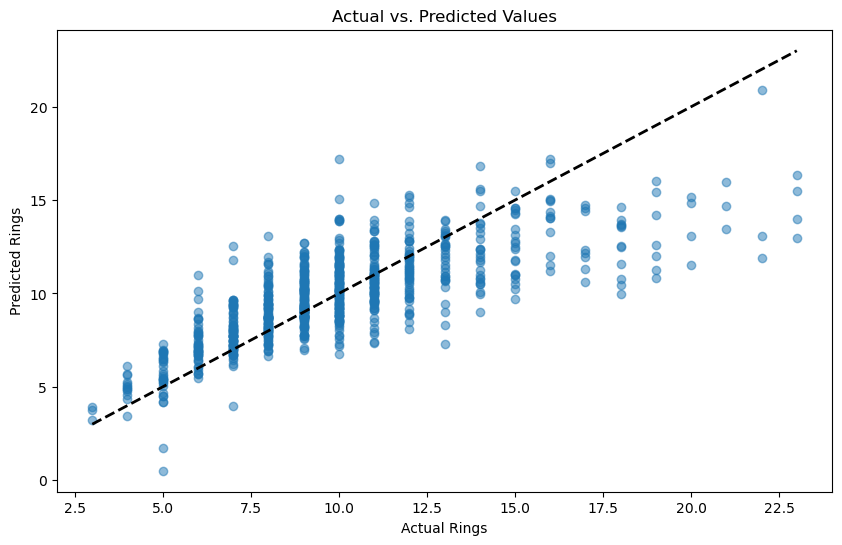

RMSE: 2.141
R² Score: 0.577


In [6]:

import matplotlib.pyplot as plt

# 예측
y_pred = model.predict(X_test).flatten()

# 실제 값과 예측 값 비교 그래프
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 완벽한 예측선
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.show()

# 성능 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# 결과 출력
print(f'RMSE: {rmse:.3f}')
print(f'R² Score: {r2:.3f}')
